Name: Yilin Pu

Github Username: pyl32

USC ID: 2952467624

In [51]:
import pandas as pd
import numpy as np
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn import tree
from sklearn.tree import _tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso
from sklearn import preprocessing
from sklearn.decomposition import PCA

ModuleNotFoundError: No module named 'graphviz'

## 1. Decision Trees as Interpretable Models
### (a) Download the Accute Inflamations data from https://archive.ics.uci.edu/ ml/datasets/Acute+Inflammations. (5 pts)

In [3]:
data_AI = pd.read_csv('../data/diagnosis.data', sep='\t',encoding="utf_16", header=None, decimal=',' )
data_AI

,0,1,2,3,4,5,6,7
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes,no,yes
116,41.5,no,no,no,no,no,no,no
117,41.5,yes,yes,no,yes,no,no,yes
118,41.5,no,yes,yes,no,yes,no,yes


### (b) Build a decision tree on the whole data set and plot it.1 (5 pts)

In [4]:
x = data_AI.iloc[:,:6]
y = data_AI.iloc[:,6:]
print(x,y)

        0    1    2    3    4    5
0    35.5   no  yes   no   no   no
1    35.9   no   no  yes  yes  yes
2    35.9   no  yes   no   no   no
3    36.0   no   no  yes  yes  yes
4    36.0   no  yes   no   no   no
..    ...  ...  ...  ...  ...  ...
115  41.4   no  yes  yes   no  yes
116  41.5   no   no   no   no   no
117  41.5  yes  yes   no  yes   no
118  41.5   no  yes  yes   no  yes
119  41.5   no  yes  yes   no  yes

[120 rows x 6 columns]        6    7
0     no   no
1    yes   no
2     no   no
3    yes   no
4     no   no
..   ...  ...
115   no  yes
116   no   no
117   no  yes
118   no  yes
119   no  yes

[120 rows x 2 columns]


In [5]:
x_dt = x.replace({'no': 0, 'yes': 1})
y_dt = y.replace({'no': 0, 'yes': 1})

feature_names = ["a1 Temperature of patient { 35C-42C }",
"a2 Occurrence of nausea { yes, no }",
"a3 Lumbar pain { yes, no }",
"a4 Urine pushing (continuous need for urination) { yes, no }",
"a5 Micturition pains { yes, no }",
"a6 Burning of urethra, itch, swelling of urethra outlet { yes, no }"]

class_names = ["d1 decision: Inflammation of urinary bladder { yes, no }",
"d2 decision: Nephritis of renal pelvis origin { yes, no }" ]

dt = tree.DecisionTreeClassifier(criterion = "entropy")
dt.fit(x_dt,y_dt)

dotfile = open("dt.dot",'w')
tree.export_graphviz(dt, out_file = dotfile, feature_names = feature_names)
dotfile.close()

text_rep = tree.export_text(dt, feature_names = feature_names)

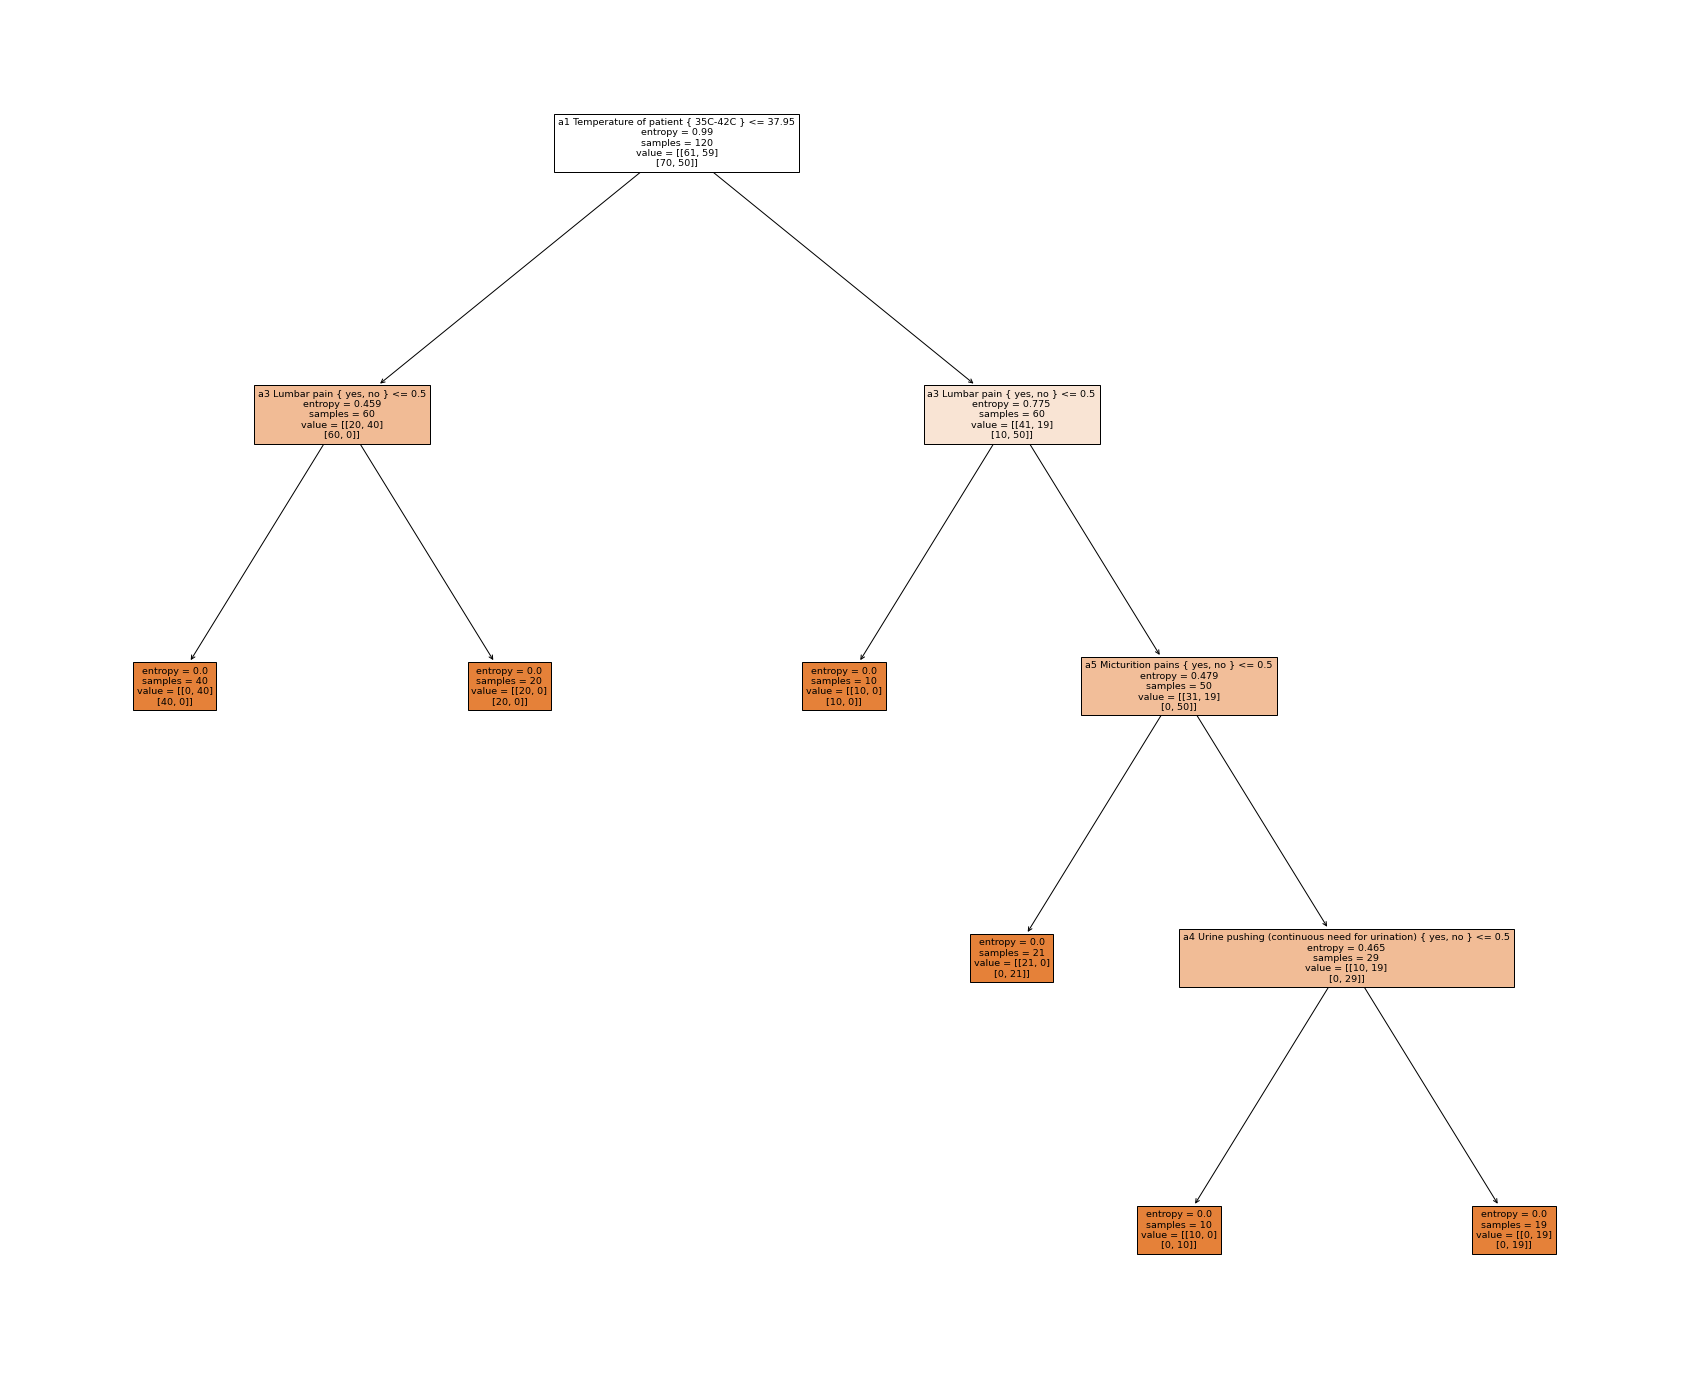

In [6]:
with open("decision_tree.log","w") as fout:
    fout.write(text_rep)
    
fig = plt.figure(figsize =(30,25))
_ = tree.plot_tree(dt,
                   feature_names = feature_names,
                   class_names = class_names,
                   filled=True)

### (c) Convert the decision rules into a set of IF-THEN rules.2 (10 pts)

In [7]:
def tree_to_code(tree, feature_names):            
    
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))
    
    def recurse(node, depth):
        indent = " " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else: # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))
    
    
    recurse(0, 1)



tree_to_code(dt, feature_names)

def tree(a1 Temperature of patient { 35C-42C }, a2 Occurrence of nausea { yes, no }, a3 Lumbar pain { yes, no }, a4 Urine pushing (continuous need for urination) { yes, no }, a5 Micturition pains { yes, no }, a6 Burning of urethra, itch, swelling of urethra outlet { yes, no }):
 if a1 Temperature of patient { 35C-42C } <= 37.95000076293945:
  if a3 Lumbar pain { yes, no } <= 0.5:
   return [[ 0. 40.]
 [40.  0.]]
  else: # if a3 Lumbar pain { yes, no } > 0.5
   return [[20.  0.]
 [20.  0.]]
 else: # if a1 Temperature of patient { 35C-42C } > 37.95000076293945
  if a3 Lumbar pain { yes, no } <= 0.5:
   return [[10.  0.]
 [10.  0.]]
  else: # if a3 Lumbar pain { yes, no } > 0.5
   if a5 Micturition pains { yes, no } <= 0.5:
    return [[21.  0.]
 [ 0. 21.]]
   else: # if a5 Micturition pains { yes, no } > 0.5
    if a4 Urine pushing (continuous need for urination) { yes, no } <= 0.5:
     return [[10.  0.]
 [ 0. 10.]]
    else: # if a4 Urine pushing (continuous need for urination) { yes, 

In [8]:
def tree_to_pseudo(tree, feature_names):
    
    left = tree.tree_.children_left
    right = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value
    
    def recurse(left, right, threshold, features, node, depth=0):
        indent = " " * depth
        if (threshold[node] != -2):
            print(indent,"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
            if left[node] != -1:
                recurse (left, right, threshold, features, left[node], depth+1)
                print(indent,"} else {")
                if right[node] != -1:
                    recurse (left, right, threshold, features, right[node], depth+1)
                print(indent,"}")
        else:
            print(indent,"return " + str(value[node]))
    
    recurse(left, right, threshold, features, 0)


tree_to_pseudo(dt, feature_names)

 if ( a1 Temperature of patient { 35C-42C } <= 37.95000076293945 ) {
  if ( a3 Lumbar pain { yes, no } <= 0.5 ) {
   return [[ 0. 40.]
 [40.  0.]]
  } else {
   return [[20.  0.]
 [20.  0.]]
  }
 } else {
  if ( a3 Lumbar pain { yes, no } <= 0.5 ) {
   return [[10.  0.]
 [10.  0.]]
  } else {
   if ( a5 Micturition pains { yes, no } <= 0.5 ) {
    return [[21.  0.]
 [ 0. 21.]]
   } else {
    if ( a4 Urine pushing (continuous need for urination) { yes, no } <= 0.5 ) {
     return [[10.  0.]
 [ 0. 10.]]
    } else {
     return [[ 0. 19.]
 [ 0. 19.]]
    }
   }
  }
 }


### (d)  Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability.

In [52]:
conda install python-graphviz

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                                           |                                                                          /failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - alabaster -> python[version='>=2.7,<2.8.0a0|>=3.6,<3.7.0a0|>=3.7,<3.8.0a0|>=3.5,<3.6.0a0']
  - anaconda==2020.07 -> python[version='3.6.10|3.7.7|3.8.3',build='h26836e1_2|hf48f09d_4|hf48f09d_2']
  - atomicwrites -> python[version='>=2.7,<2.8.0a0|>=3.6,<3.7.

gmpy2 -> python[version='>=3.10,<3.11.0a0'] -> xz[version='>=5.2.3,<6.0a0|>=5.2.4,<6.0a0|>=5.2.5,<6.0a0']
prompt-toolkit -> python -> xz[version='>=5.2.3,<6.0a0|>=5.2.4,<6.0a0|>=5.2.5,<6.0a0']
applaunchservices -> python -> xz[version='>=5.2.3,<6.0a0|>=5.2.4,<6.0a0|>=5.2.5,<6.0a0']
path -> python[version='>=3.6'] -> xz[version='>=5.2.3,<6.0a0|>=5.2.4,<6.0a0|>=5.2.5,<6.0a0']
heapdict -> python -> xz[version='>=5.2.3,<6.0a0|>=5.2.4,<6.0a0|>=5.2.5,<6.0a0']
flake8 -> python[version='>=3.6'] -> xz[version='>=5.2.3,<6.0a0|>=5.2.4,<6.0a0|>=5.2.5,<6.0a0']
nbconvert -> python[version='>=3.9,<3.10.0a0'] -> xz[version='>=5.2.3,<6.0a0|>=5.2.4,<6.0a0|>=5.2.5,<6.0a0']
patsy -> python[version='>=3.10,<3.11.0a0'] -> xz[version='>=5.2.3,<6.0a0|>=5.2.4,<6.0a0|>=5.2.5,<6.0a0']
scikit-learn -> python[version='>=3.7,<3.8.0a0'] -> xz[version='>=5.2.3,<6.0a0|>=5.2.4,<6.0a0|>=5.2.5,<6.0a0']
xlwings -> python[version='>=3.10,<3.11.0a0'] -> xz[version='>=5.2.3,<6.0a0|>=5.2.4,<6.0a0|>=5.2.5,<6.0a0']
rtree -> pyt

Package ruamel_yaml conflicts for:
anaconda==2020.07 -> ruamel_yaml==0.15.87[build='py38haf1e3a3_1|py36haf1e3a3_1|py37haf1e3a3_1']
conda[version='>=4.12.0'] -> ruamel_yaml[version='>=0.11.14,<0.16|>=0.11.14,<0.17']
anaconda-client -> ruamel_yaml[version='<0.15|>=0.11.14']
anaconda-project -> anaconda-client -> ruamel_yaml[version='<0.15|>=0.11.14']
anaconda-project -> ruamel_yaml
conda-build -> conda[version='>=4.5'] -> ruamel_yaml[version='>=0.11.14|>=0.11.14,<0.16|>=0.11.14,<0.17']
anaconda==2020.07 -> anaconda-project==0.8.4=py_0 -> ruamel_yaml
anaconda-navigator -> anaconda-client -> ruamel_yaml[version='<0.15|>=0.11.14']

Package jsonschema conflicts for:
nbformat -> jsonschema[version='>=2.4,!=2.5.0']
jupyterlab_server -> jsonschema[version='>=3.0.1']
jupyterlab -> jupyterlab_server[version='>=2.10,<3'] -> jsonschema[version='>=3.0.1']
anaconda==2020.07 -> jupyterlab_server==1.2.0=py_0 -> jsonschema[version='>=2.4,!=2.5.0|>=3.0.1']
anaconda==2020.07 -> jsonschema==3.2.0[build='py


Note: you may need to restart the kernel to use updated packages.


In [55]:
# unknow reason, fail to install graphviz

In [54]:
p1 = y_dt.iloc[:,:1]

class_names = ['No Bladder Inflammation','Bladder Inflammation']
n = [(x+1)/10 for x in range(10)]
param = {'min_impurity_decrease':n}


classifier = GridSearchCV(DecisionTreeClassifier(), param)
classifier.fit(x_dt, y_dt)
pruned_bladder = classifier.best_estimator_
print(classifier.best_score_, classifier.best_params_)

plot = graphviz.Source(export_graphviz(pruned_bladder, feature_names = feature_names, class_names = class_names))
display(plot)

0.5666666666666667 {'min_impurity_decrease': 0.1}


NameError: name 'graphviz' is not defined

In [56]:
p2 = y_dt.iloc[:,1:2]

class_names = ['No Nephritis','Nephritis']
n = [(x+1)/10 for x in range(10)]
param = {'min_impurity_decrease':n}


classifier = GridSearchCV(DecisionTreeClassifier(), param)
classifier.fit(x_dt, y_dt)
pruned_Nephritis = classifier.best_estimator_
print(classifier.best_score_, classifier.best_params_)

plot2 = graphviz.Source(export_graphviz(pruned_Nephritis, feature_names = feature_names, class_names = class_names))
display(plot2)

0.5666666666666667 {'min_impurity_decrease': 0.1}


NameError: name 'graphviz' is not defined

## 2. The LASSO and Boosting for Regression
### (a) Download the Communities and Crime data3 from https://archive.ics.uci. edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data as the training set and the rest as the test set.

In [5]:
data_cc = pd.read_csv('../data/communities.data', header = None, na_values = '?')
data_cc

train_cc = data_cc[:1495]
test_cc = data_cc[1495:]

print(train_cc)
print(test_cc)

      0     1        2                    3    4     5     6     7     8    \
0       8   NaN      NaN         Lakewoodcity    1  0.19  0.33  0.02  0.90   
1      53   NaN      NaN          Tukwilacity    1  0.00  0.16  0.12  0.74   
2      24   NaN      NaN         Aberdeentown    1  0.00  0.42  0.49  0.56   
3      34   5.0  81440.0  Willingborotownship    1  0.04  0.77  1.00  0.08   
4      42  95.0   6096.0    Bethlehemtownship    1  0.01  0.55  0.02  0.95   
...   ...   ...      ...                  ...  ...   ...   ...   ...   ...   
1490    6   NaN      NaN     Hillsboroughtown    8  0.00  0.59  0.01  0.69   
1491    6   NaN      NaN           Orangecity    8  0.16  0.62  0.03  0.74   
1492   13   NaN      NaN         Waycrosscity    8  0.01  0.36  0.95  0.24   
1493   39  85.0  49056.0           Mentorcity    8  0.06  0.53  0.01  0.98   
1494   34  17.0  79610.0      WestNewYorktown    8  0.05  0.43  0.08  0.65   

       9    ...   118   119   120   121   122   123  124   125 

### (b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.

In [6]:
data_cc = data_cc.iloc[:, 5:] 

imp_mean = SimpleImputer(missing_values=np.nan)
imp_mean = pd.DataFrame(imp_mean.fit_transform(data_cc))

train_cc = imp_mean[0:1495]
test_cc = imp_mean[1495:]

x_train = train_cc.iloc[:, :-1]
y_train = train_cc.iloc[:, -1]

x_test = test_cc.iloc[:, :-1]
y_test = test_cc.iloc[:, -1]


print(y_train, y_test)

0       0.20
1       0.67
2       0.43
3       0.12
4       0.03
        ... 
1490    0.03
1491    0.20
1492    0.30
1493    0.03
1494    0.23
Name: 122, Length: 1495, dtype: float64 1495    0.12
1496    0.11
1497    0.12
1498    0.06
1499    0.12
        ... 
1989    0.09
1990    0.45
1991    0.23
1992    0.19
1993    0.48
Name: 122, Length: 499, dtype: float64


### (c) Plot a correlation matrix for the features in the data set.

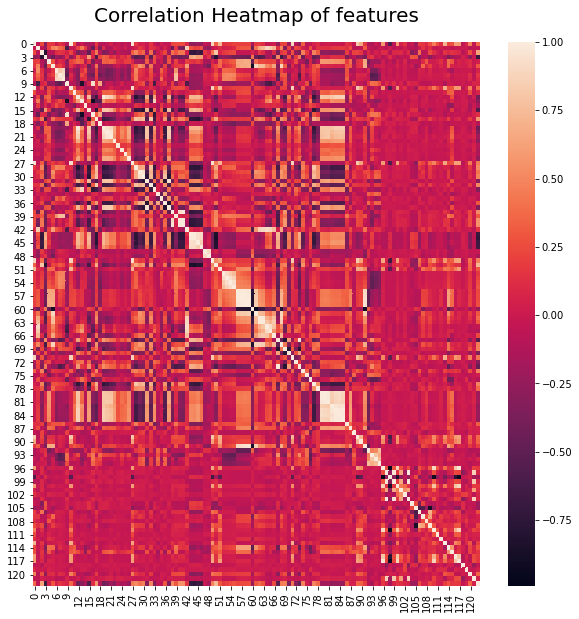

In [7]:
corr_cc = imp_mean.corr()
fit, axes = plt.subplots(figsize=(10, 10))
heatmap = sns.heatmap(corr_cc, ax=axes)
heatmap.set_title('Correlation Heatmap of features', fontdict={'fontsize':20}, pad=20);
plt.show()

### (d) Calculate the Coefficient of Variation CV for each feature, where CV = ms , in which s is sample standard deviation and m is sample mean..

In [8]:
cv = imp_mean.apply(lambda col : col.std() / col.mean(), axis=0)
print(cv)

0      2.203503
1      0.353298
2      1.410920
3      0.323782
4      1.359162
         ...   
118    0.122331
119    0.368040
120    2.555266
121    0.337281
122    0.979015
Length: 123, dtype: float64


In [9]:
cv = x_train.apply(lambda x: np.std(x)/np.mean(x)).sort_values(ascending=False)
cv

90     4.291487
89     3.469791
49     3.057941
51     2.925656
120    2.552092
         ...   
111    0.143485
104    0.133692
105    0.122541
118    0.117949
98     0.063981
Length: 122, dtype: float64

### (e) Pick ⌊ √ 128 ⌋ features with highest CV , and make scatter plots and box plots for them. Can you draw conclusions about signiﬁcance of those features, just by the scatter plots?

In [10]:
best_feat = cv.head(11).index
print(" The 11 features with best cv is:\n",best_feat)

bestfeat_df = pd.concat([imp_mean.loc[:, best_feat], y_train], axis= 'columns')
bestfeat_df

 The 11 features with best cv is:
 Int64Index([90, 89, 49, 51, 120, 27, 0, 10, 71, 113, 5], dtype='int64')


,90,89,49,51,120,27,0,10,71,113,5,122
0,0.00,0.04,0.04,0.03,0.32,0.08,0.19,0.20,0.21,0.12,0.17,0.20
1,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.02,0.02,0.02,0.07,0.67
2,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.04,0.43
3,0.00,0.00,0.03,0.02,0.00,0.01,0.04,0.06,0.01,0.02,0.10,0.12
4,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.01,0.04,0.05,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.03,0.02,0.01,0.16,NaN
1990,0.00,0.01,0.03,0.05,0.00,0.04,0.05,0.06,0.03,0.02,0.32,NaN
1991,0.02,0.06,0.13,0.06,0.91,0.12,0.16,0.17,0.21,0.08,0.25,NaN
1992,0.01,0.04,0.02,0.06,0.22,0.03,0.08,0.09,0.05,0.03,0.10,NaN


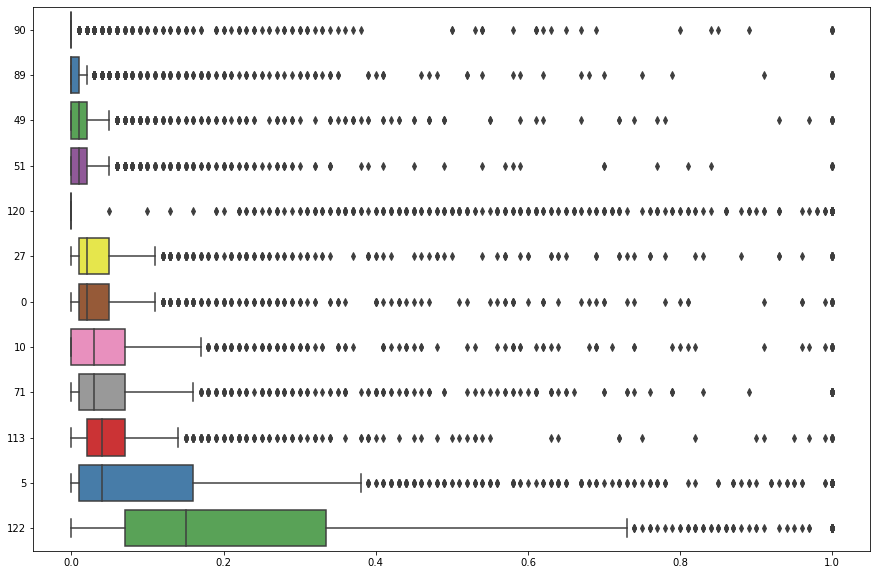

In [11]:
plt.figure(figsize=(15,10))
sns.boxplot(data=bestfeat_df, orient="h", palette="Set1")

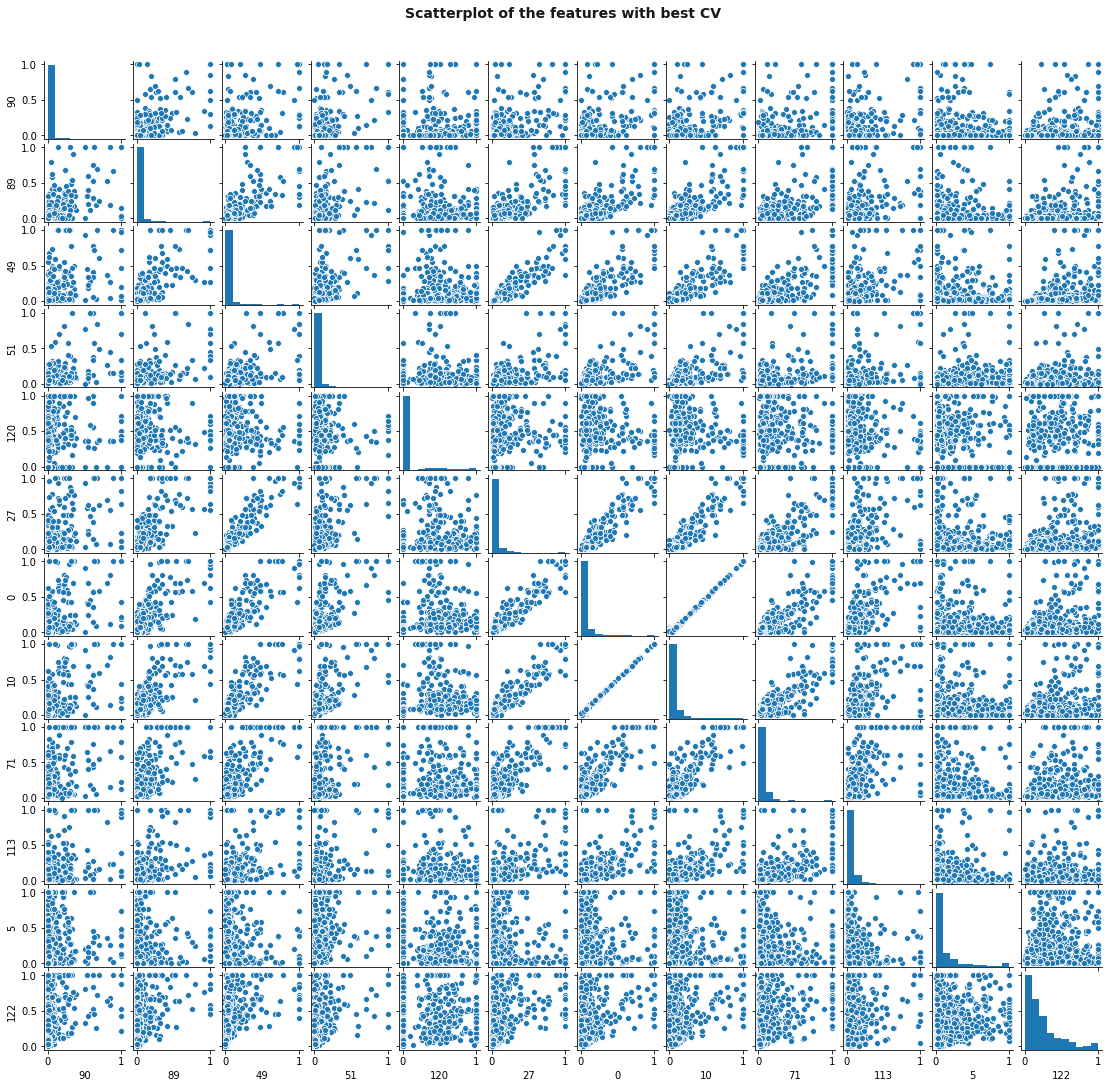

In [12]:
figure = sns.pairplot(bestfeat_df)
figure.fig.set_size_inches(15,15)
plt.subplots_adjust(top = .93 )
figure.fig.suptitle("Scatterplot of the features with best CV ", fontsize = 14, alpha = 0.9, weight = 'bold')
plt.show()

The data points in most of the cases are spread across and thus it's difficult to find out pattern. 

### (f) Fit a linear model using least squares to the training set and report the test error.


In [13]:
import statsmodels.api as stat
from sklearn import metrics

model = stat.OLS(y_train, x_train)
model_fit = model.fit()
p_values = model_fit.pvalues
p_values[p_values  < 0.01]

2      0.000003
11     0.007636
18     0.005823
28     0.005314
33     0.001147
39     0.001952
48     0.001039
68     0.001249
74     0.002206
75     0.002140
88     0.003461
90     0.002596
102    0.007199
dtype: float64

In [14]:
train_error = model_fit.mse_resid
print('Training Error of OLS: %0.3f' % train_error)
y_pred = model_fit.predict(x_test)
test_error = sum((y_test - y_pred)**2)/(len(y_pred))
print('Test Error of OLS: %0.3f' % test_error)

r2 = metrics.r2_score(y_test, y_pred)
print("R2 score for testing data ", r2)

model_fit.summary()

Training Error of OLS: 0.018
Test Error of OLS: 0.781
R2 score for testing data  -15.425232851784848


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    122   R-squared (uncentered):                   0.858
Model:                            OLS   Adj. R-squared (uncentered):              0.845
Method:                 Least Squares   F-statistic:                              67.83
Date:                Thu, 24 Mar 2022   Prob (F-statistic):                        0.00
Time:                        23:44:29   Log-Likelihood:                          957.08
No. Observations:                1495   AIC:                                     -1670.
Df Residuals:                    1373   BIC:                                     -1022.
Df Model:                         122                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.0318      0.476      0.067      0.947      -0.903       0.966
1             -0.0196      0.098     -0.201      0.841      -0.211       0.172
2              0.2796      0.060      4.666      0.000       0.162       0.397
3              0.0047      0.067      0.071      0.944      -0.126       0.135
4             -0.0273      0.041     -0.662      0.508      -0.108       0.054
5              0.0133      0.065      0.203      0.839      -0.115       0.141
6              0.1791      0.129      1.390      0.165      -0.074       0.432
7             -0.3330      0.184     -1.808      0.071      -0.694       0.028
8             -0.1292      0.197     -0.658      0.511      -0.515       0.256
9              0.0604      0.124      0.489      0.625      -0.182       0.303
10            -0.1841      0.465     -0.396      0.692      -1.097       0.728
11             0.0501      0.019      2.672      0.008       0.013       0.087
12            -0.1671      0.202     -0.827      0.408      -0.563       0.229
13            -0.1345      0.107     -1.261      0.208      -0.344       0.075
14             0.0456      0.023      1.945      0.052      -0.000       0.091
15            -0.2058      0.081     -2.544      0.011      -0.364      -0.047
16             0.1412      0.125      1.130      0.259      -0.104       0.386
17             0.0614      0.054      1.134      0.257      -0.045       0.168
18            -0.1228      0.044     -2.762      0.006      -0.210      -0.036
19             0.3008      0.188      1.598      0.110      -0.068       0.670
20            -0.0432      0.222     -0.195      0.845      -0.478       0.391
21            -0.1965      0.179     -1.097      0.273      -0.548       0.155
22            -0.0396      0.030     -1.342      0.180      -0.097       0.018
23            -0.0430      0.023     -1.890      0.059      -0.088       0.002
24             0.0297      0.022      1.366      0.172      -0.013       0.072
25             0.0307      0.022      1.382      0.167      -0.013       0.074
26             0.0325      0.029      1.136      0.256      -0.024       0.089
27             0.0810      0.192      0.422      0.673      -0.295       0.457
28            -0.2070      0.074     -2.792      0.005      -0.352      -0.062
29            -0.0520      0.079     -0.662      0.508      -0.206       0.102
30             0.0226      0.111      0.203      0.839      -0.196       0.241
31             0.1002      0.093      1.079      0.281      -0.082       0.282
32             0.0232      0.048      0.485      0.628      -0.070       0.117
33             0.2925      0.090      3.259      0.001       0.116       0.469
34            -0.0461      0.038     -1.213      0.225      -

### (g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [15]:
# fold as 5np.logspace(0,1,200)
ridge_md = RidgeCV(alphas = [1e-3, 1e-2, 1e-1, 0.1, 1, 10, 100, 1e3, 1e4, 2e4, 5e4, 8e4, 1e5, 1e6, 1e7, 1e8],\
                      cv = KFold(n_splits = 5, shuffle = True))
ridge_fit = ridge_md.fit(x_train, y_train)
print("using Ridge for 5 fold cross validation",ridge_fit.alpha_ )


y_pred_train = ridge_fit.predict(x_train)
train_error_ridge = sum((y_train - y_pred_train)**2)/(len(y_pred_train))
print('Training Error of Ridge: %0.3f' % train_error_ridge)

y_pred_ridge = ridge_fit.predict(x_test)
test_error_ridge = sum((y_test - y_pred_ridge)**2)/(len(y_pred_ridge))
print('Test Error of Ridge: %0.3f' % test_error_ridge)

r2 = metrics.r2_score(y_test, y_pred_ridge)
print("R2 score for testing data ", r2)

using Ridge for 5 fold cross validation 10.0
Training Error of Ridge: 0.018
Test Error of Ridge: 0.017
R2 score for testing data  0.6332639048719632


R2 score for ridge regression is better compare to R2 score of linear regression

### (h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized4 features. Report the test error for both cases and compare them.

In [16]:
lasso_md = LassoCV(alphas = [1e-3, 1e-2, 1e-1, 0.1, 1, 10, 100, 1e3, 1e4, 2e4, 5e4, 8e4, 1e5, 1e6, 1e7, 1e8],\
                      cv = KFold(n_splits = 5, shuffle = True))
lasso_fit = lasso_md.fit(x_train, y_train)
print("using lasso for 5 fold cross validation",lasso_fit.alpha_ )

var_select = x_train.columns[np.where(lasso_fit.coef_!=0)]
var_select

y_pred_trainl = lasso_fit.predict(x_train)
train_error_lasso = sum((y_train - y_pred_trainl)**2)/(len(y_pred_trainl))
print('Training Error of lasso: %0.3f' % train_error_lasso)

y_pred_lasso = lasso_fit.predict(x_test)
test_error_lasso = sum((y_test - y_pred_lasso)**2)/(len(y_pred_lasso))
print('Test Error of lasso: %0.3f' % test_error_lasso)

r2 = metrics.r2_score(y_test, y_pred_lasso)
print("R2 score for testing data ", r2)

using lasso for 5 fold cross validation 0.001
Training Error of lasso: 0.019
Test Error of lasso: 0.018
R2 score for testing data  0.6310550538601054


R2 score of Lasso is slightly less than Ridge

In [17]:
scaler = preprocessing.StandardScaler()

x_trainsd = scaler.fit_transform(x_train)
x_testsd = scaler.fit_transform(x_test)

lasso_mdsd = LassoCV(alphas = [1e-3, 1e-2, 1e-1, 0.1, 1, 10, 100, 1e3, 1e4, 2e4, 5e4, 8e4, 1e5, 1e6, 1e7, 1e8],\
                      cv = KFold(n_splits = 5, shuffle = True))
lasso_fit_norm = lasso_mdsd.fit(x_trainsd, y_train)

print("using normazlized lasso for 5 fold cross validation",lasso_fit_norm.alpha_ )


y_pred_trainnm = lasso_fit_norm.predict(x_trainsd)
train_error_sd = sum((y_train - y_pred_trainl)**2)/(len(y_pred_trainnm))
print('Training Error of normalized data using Lasso: %0.3f' % train_error_sd)

y_pred_norm = lasso_fit_norm.predict(x_testsd)
test_error_sd = sum((y_test - y_pred_norm)**2)/(len(y_pred_norm))
print('Test Error of normalized data using Lasso: %0.3f' % test_error_sd)

r2 = metrics.r2_score(y_test, y_pred_norm)
print("R2 score for testing data ", r2)

using normazlized lasso for 5 fold cross validation 0.001
Training Error of normalized data using Lasso: 0.019
Test Error of normalized data using Lasso: 0.018
R2 score for testing data  0.622438475885954


R2 score with normalized data is greater than R2 score using lasso on raw data.

### (i) Fit a PCR model on the training set, with M (the number of principal compo- nents) chosen by cross-validation. Report the test error obtained.

In [18]:
def stdscaler(input):
    scaler = preprocessing.StandardScaler()
    val_x = scaler.fit_transform(input)
    val_x = pd.DataFrame(val_x)
    val_x.columns = input.columns
    return val_x

def find_cv_pca(X_train, Y_train): 
    error_list = np.array([])
    p_val = np.array([])
    for p in range(1, X_train.shape[1] + 1):
        cv = KFold(n_splits = 5)
        cv_error = 0
        p_val = np.append(p_val, p)
        for train_x, valid_x in cv.split(X_train):
            pca = PCA(n_components=p).fit(stdscaler(X_train.loc[train_x]))
            train_pc = pca.transform(stdscaler(X_train.loc[train_x]))
            valid_pc = pca.transform(stdscaler(X_train.loc[valid_x]))
            lr_reg = stat.OLS(Y_train[train_x], train_pc).fit()
            y_pred_v = lr_reg.predict(valid_pc)        
            cv_error += sum((Y_train[valid_x] - y_pred_v)**2)/(len(y_pred_v))
        error_list = np.append(error_list, np.mean(cv_error))
    return error_list, p_val

In [19]:
error_list, p_values = find_cv_pca(x_train, y_train)

result = pd.DataFrame({'Component':p_values,'CV error':error_list})
result

,Component,CV error
0,1.0,0.454869
1,2.0,0.435655
2,3.0,0.429652
3,4.0,0.429752
4,5.0,0.419606
...,...,...
117,118.0,0.392049
118,119.0,0.391886
119,120.0,0.392018
120,121.0,0.392116


In [20]:
ind = np.argmin(result['CV error'])
best_c = (result['Component'][ind]).astype(int)
best_cv_error = (result['CV error'][ind])

print("the least cv error and component found is :", best_cv_error," M: ", best_c)



x_train_scale = stdscaler(x_train) 
x_test_scale = stdscaler(x_test)

# Training error
best_pca = PCA(n_components = best_c).fit(x_test_scale)
x_train_pca = best_pca.transform(x_train_scale)
x_test_pca = best_pca.transform(x_test_scale)
        
stat_reg = stat.OLS(y_train, x_train_pca).fit()
train_pred = stat_reg.predict(x_train_pca)
pca_train_error = sum((y_train - train_pred)**2)/(len(train_pred))
print('Train Error of PCR: %0.3f' % pca_train_error)

# Testing error
test_pred = stat_reg.predict(x_test_pca)
pca_test_error = sum((y_test - test_pred)**2)/(len(test_pred))
print('Test Error of PCR: %0.3f' % pca_test_error)

the least cv error and component found is : 0.38616393492787426  M:  95
Train Error of PCR: 0.075
Test Error of PCR: 0.071


### (j) In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost5 to fit the model tree. Determine α (the regularization term) using cross-validation.

In [21]:
conda install -c conda-forge xgboost

Solving environment: | ^C
failed with initial frozen solve. Retrying with flexible solve.

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


In [25]:
import xgboost as xgb

all_cv = np.array([])
train_dmatrix = xgb.DMatrix(data=x_train, label= y_train)
alpha_values = [1e-3, 1e-2, 1e-1, 0.1, 1, 10, 100, 1e3, 1e4, 2e4, 5e4, 8e4, 1e5, 1e6, 1e7, 1e8]
for alpha in alpha_values:
    params = {"objective":"reg:squarederror",'colsample_bytree': 0.3, 'alpha': alpha, "booster":"gbtree" }
    xgb_cv = xgb.cv(dtrain=train_dmatrix , params=params, nfold=5, num_boost_round=50, early_stopping_rounds=10, metrics="rmse") 
    all_cv = np.append(all_cv, xgb_cv["test-rmse-mean"].tail(1).values)
    

cv_ = pd.DataFrame({'alpha':alpha_values,'CV Rmse mean':all_cv})
cv_

,alpha,CV Rmse mean
0,1.000000e-03,0.147518
1,1.000000e-02,0.146413
2,1.000000e-01,0.147291
3,1.000000e-01,0.147291
4,1.000000e+00,0.144153
5,1.000000e+01,0.148657
6,1.000000e+02,0.193137
7,1.000000e+03,0.351665
8,1.000000e+04,0.351665
9,2.000000e+04,0.351665


In [27]:
ind_ = np.argmin(cv_['CV Rmse mean'])
best_alpha = (cv_['alpha'][ind_])
best_cv_error = (cv_['CV Rmse mean'][ind_])
print("the least cv error :", best_cv_error," and best alpha is: ", best_alpha)

the least cv error : 0.14415260000000002  and best alpha is:  1.0


In [28]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3, "booster":"gbtree", 'alpha': best_alpha }

cv_results = xgb.cv(dtrain=train_dmatrix , params=params, nfold=5, num_boost_round=50, early_stopping_rounds=10, metrics="rmse")
boost_round = cv_results.shape[0]
print(boost_round)

xg_reg = xgb.train(params=params, dtrain=train_dmatrix, num_boost_round = boost_round)
train_xgb_pred = xg_reg.predict(train_dmatrix)
train_xgb_error = sum((train_xgb_pred - y_train)**2)/len(train_xgb_pred)
print('Train Error of PCR: %0.3f' % train_xgb_error)


test_dmatrix = xgb.DMatrix(x_test)
test_xgb_pred = xg_reg.predict(test_dmatrix)
test_xgb_error = sum((test_xgb_pred - y_test)**2)/len(test_xgb_pred)
print('Test Error of PCR: %0.3f' % test_xgb_error)

29
Train Error of PCR: 0.004
Test Error of PCR: 0.018


Train error is the lowest compare to other models.

Overall, Ridge penalized model performs the best as testing error is found the least:  0.017

## Reference

https://xgboost.readthedocs.io/en/stable/python/python_intro.html

https://stackoverflow.com/questions/61971851/getting-this-simple-problem-while-importing-xgboost-on-jupyter-notebook

